In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'data\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Все данные заполнены, далее проанализируем их.

In [15]:
bins = range(0, 110, 10)
labels = [f'{i}-{i + 9}' for i in bins[:-1]]
labels[-1] = "90-100"
print(labels)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']


In [16]:
data["math_score_group"] = pd.cut(data["math score"], bins=bins, labels=labels, include_lowest=True)
data["reading_score_group"] = pd.cut(data["reading score"], bins=bins, labels=labels, include_lowest=True)
data["writing_score_group"] = pd.cut(data["writing score"], bins=bins, labels=labels, include_lowest=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_score_group             1000 non-null   category
 9   reading_score_group          1000 non-null   category
 10  writing_score_group          1000 non-null   category
dtypes: category(3), int64(3), object(5)
memory usage: 66.7+ KB


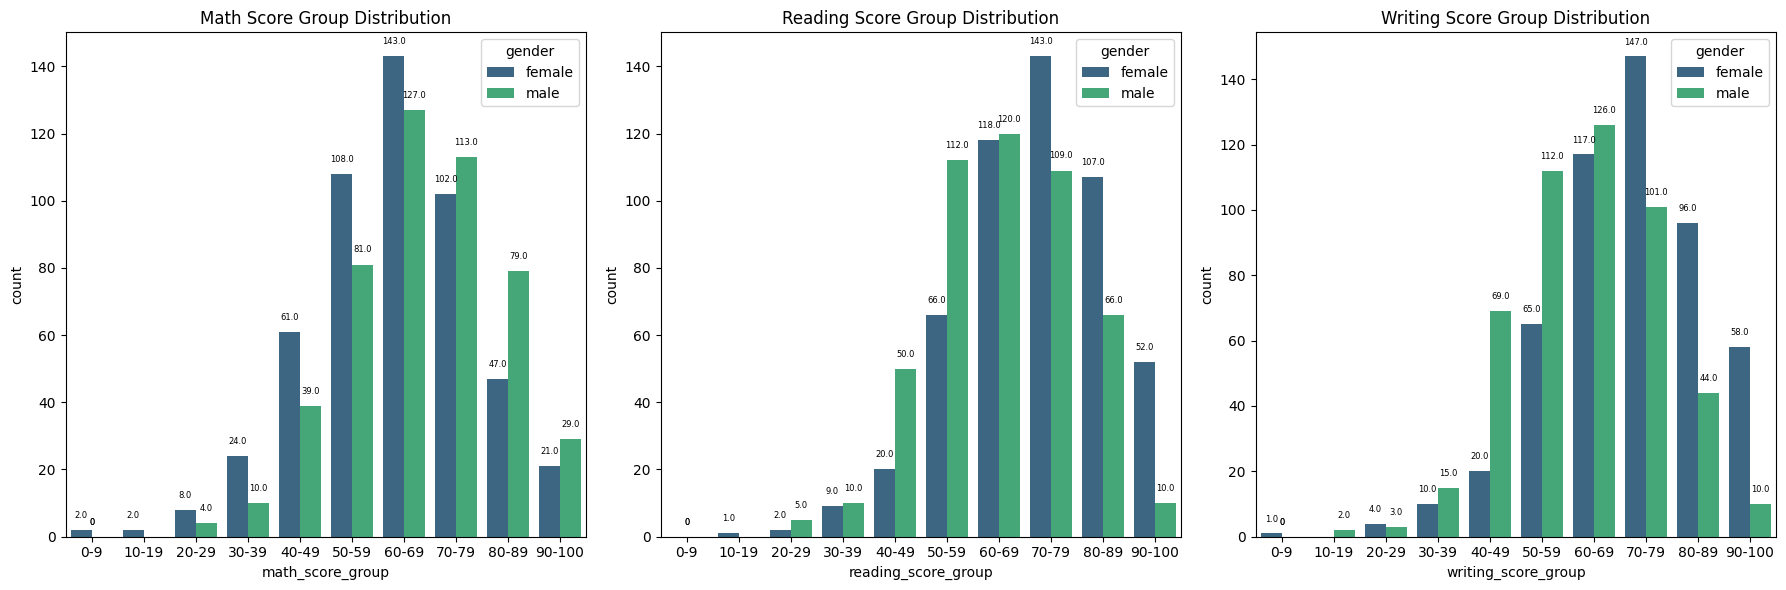

In [27]:
plt.figure(figsize=(18, 6))

# График для math_score_group
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=data, x="math_score_group", palette="viridis", hue="gender")
plt.title("Math Score Group Distribution")

# График для reading_score_group
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=data, x="reading_score_group", palette="viridis", hue="gender")
plt.title("Reading Score Group Distribution")

# График для writing_score_group
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=data, x="writing_score_group", palette="viridis", hue="gender")
plt.title("Writing Score Group Distribution")

def signatures(ax):
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = height + 3  
        ax.text(x, y, f'{height}', ha='center', va='bottom', fontsize=6)

signatures(ax1)
signatures(ax2)
signatures(ax3)

# Отображаем все графики
plt.tight_layout()
plt.show()


### Заметим, что девушки хуже справляются с математикой чем мужчины, но в чтении (вероятно литертуре) и в грамматике... лучше, так же замечу, что девушек больше, проверим

In [28]:
gender_count = data["gender"].value_counts()
print(gender_count)

gender
female    518
male      482
Name: count, dtype: int64


### Различие на самом деле есть, хотя не такое большое как я думал, хочу посмотреть на графики учитывая разницу в количестве людей

In [ ]:
kol_female = 518
kol_male = 482


gender_percentage = data.groupby('gender')['math_score_group'].value_counts()

print(gender_percentage)

female = [x for x in "2      2      8     24     61    108    143    102     47 21".split(' ') if x != '']
female = list(map(int, female))
male = [x for x in "0      0      4     10     39     81    127    113     79 29".split(' ') if x != '']
male = list(map(int, male))
print(female, male)

math_score_group  0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  \
gender                                                                          
female              2      2      8     24     61    108    143    102     47   
male                0      0      4     10     39     81    127    113     79   

math_score_group  90-100  
gender                    
female                21  
male                  29  
[2, 2, 8, 24, 61, 108, 143, 102, 47, 21] [0, 0, 4, 10, 39, 81, 127, 113, 79, 29]
